In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Exercises for Monday
***
# Exercise 1 : Overfitting / Underfitting

After running the generator, load the `overfitting_data.csv`.

In [2]:
# Load the dataset
data = pd.read_csv(f'/Users/gaspardvilla/src/Nomades_ADA/data/week_3/overfitting_data.csv')

Using the folowing models, plot the prdictions you obtained for each of the models.

In [3]:
# Fit polynomial regression
model_true = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_under = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_over = make_pipeline(PolynomialFeatures(10), LinearRegression())

# Your code here - fit the models to the data
model_true.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_under.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_over.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,10
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


Which model has the best performances ? \
Plot the curve predicted by each of these models.

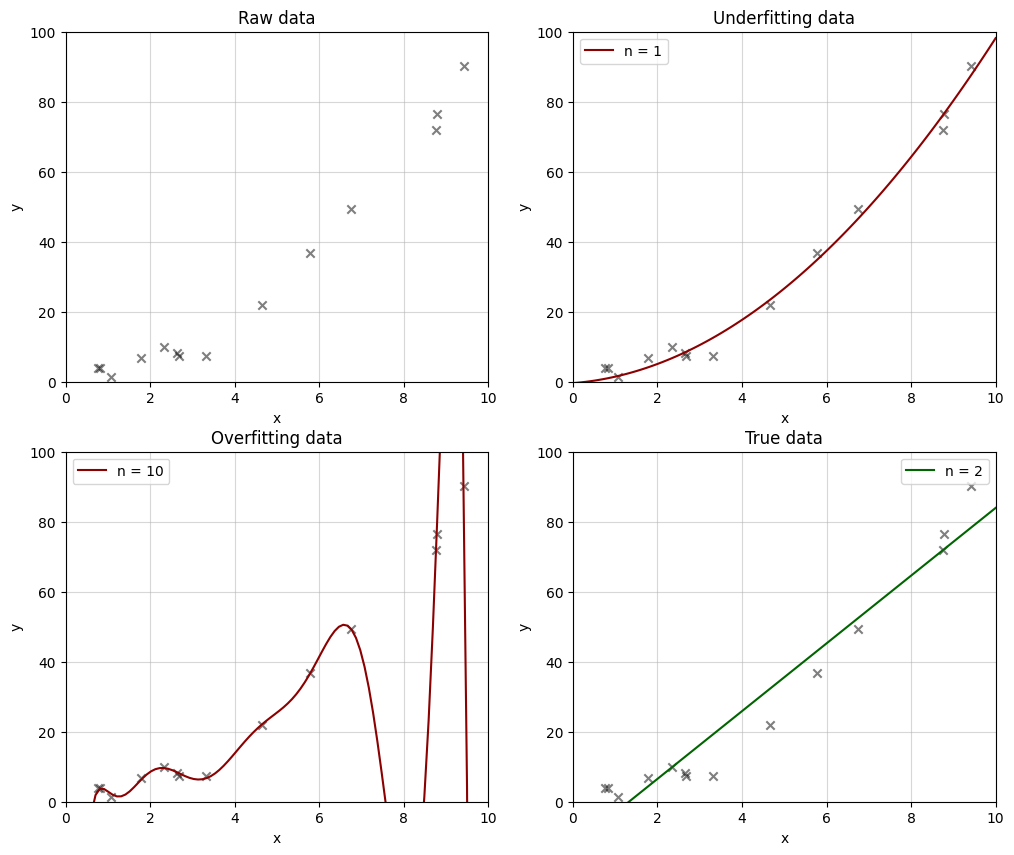

In [4]:
# Viz models
viz_x = np.linspace(0, 10, 100)

# Plot x,y
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.grid(True,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Raw data')

plt.subplot(2, 2, 2)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_under.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 1')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Underfitting data')

plt.subplot(2, 2, 3)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_over.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 10')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Overfitting data')

plt.subplot(2, 2, 4)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_true.predict(viz_x.reshape(-1, 1)), color='darkgreen', label='n = 2')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('True data')
plt.show()

Text(0, 0.5, 'y')

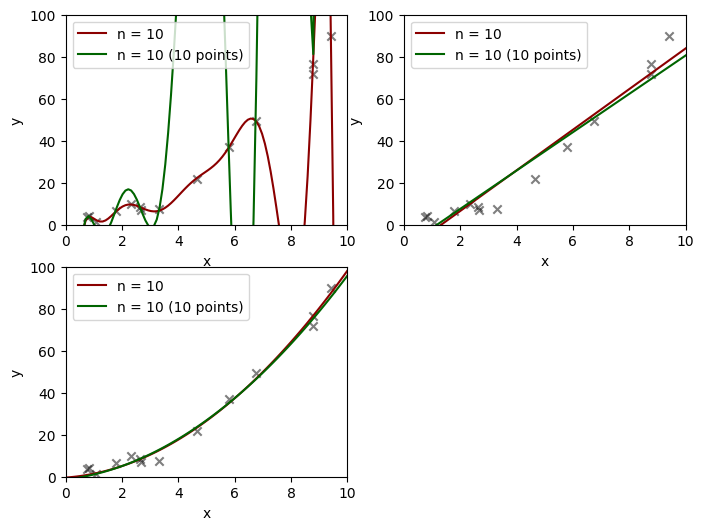

In [5]:
model_under1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_under2 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_true1 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_true2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_over1 = make_pipeline(PolynomialFeatures(10), LinearRegression())
model_over2 = make_pipeline(PolynomialFeatures(10), LinearRegression())

model_under1.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_under2.fit(data['x'].to_numpy().reshape(-1, 1)[:10], data['y'].to_numpy().reshape(-1, 1)[:10])
model_true1.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_true2.fit(data['x'].to_numpy().reshape(-1, 1)[:10], data['y'].to_numpy().reshape(-1, 1)[:10])
model_over1.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_over2.fit(data['x'].to_numpy().reshape(-1, 1)[:10], data['y'].to_numpy().reshape(-1, 1)[:10])

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_over1.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 10')
plt.plot(viz_x, model_over2.predict(viz_x.reshape(-1, 1)), color='darkgreen', label='n = 10 (10 points)')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,100)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 2)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_under1.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 10')
plt.plot(viz_x, model_under2.predict(viz_x.reshape(-1, 1)), color='darkgreen', label='n = 10 (10 points)')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,100)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 3)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_true1.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 10')
plt.plot(viz_x, model_true2.predict(viz_x.reshape(-1, 1)), color='darkgreen', label='n = 10 (10 points)')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,100)
plt.xlabel('x')
plt.ylabel('y')

***
# Exercise 2 : Cross-validation using sklearn

Load the dataset `knn_dataset.csv` (NOT THE `knn_testset.csv`).

In [6]:
# Load the knn_dataset.csv
data = pd.read_csv(f'/Users/gaspardvilla/src/Nomades_ADA/data/week_3/knn_dataset.csv')


Split the dataset into a Training / Testing set with the function `train_test_split` from sklearn, using a repartition 80% - 20%.

In [7]:
# Your code here
from sklearn.model_selection import train_test_split

stratified = True
if not stratified:
    X_train, X_test, y_train, y_test = train_test_split(data[['coord_x', 'coord_y']], 
                                                        data['target'], 
                                                        test_size = 0.2, 
                                                        random_state = 42)
else:
    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(data[['coord_x', 'coord_y']], 
                                                        data['target'], 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        stratify=data['target'])

***
# Exercise 3 : KNN model

Train a KNN a model on the train set and validate the results on the test set.


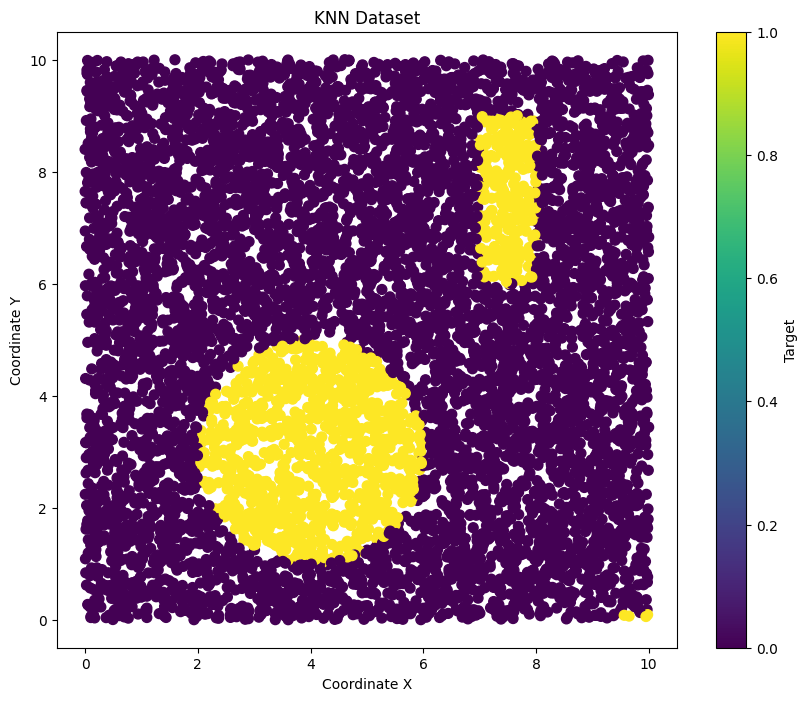

In [8]:
# PLot the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X_train['coord_x'], X_train['coord_y'], c=y_train, cmap='viridis', s=50)
plt.colorbar(label='Target')
plt.title('KNN Dataset')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

In [9]:
print(len(data[(0 <= data['coord_y']) & (data['coord_y'] <= 0.1) & (9.5 <= data['coord_x']) & (data['coord_x'] <= 10)]))
print(len(X_train[(0 <= X_train['coord_y']) & (X_train['coord_y'] <= 0.1) & (9.5 <= X_train['coord_x']) & (X_train['coord_x'] <= 10)]))

5
4


In [10]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9925


Now, load a real test set `knn_testset.csv` and test your model. What happens to your performances ? 

In [11]:
# Your code here
data = pd.read_csv('/Users/gaspardvilla/src/Nomades_ADA/data/week_3/knn_testset.csv')

X_test = data[['coord_x', 'coord_y']]
y_test = data['target']

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.85


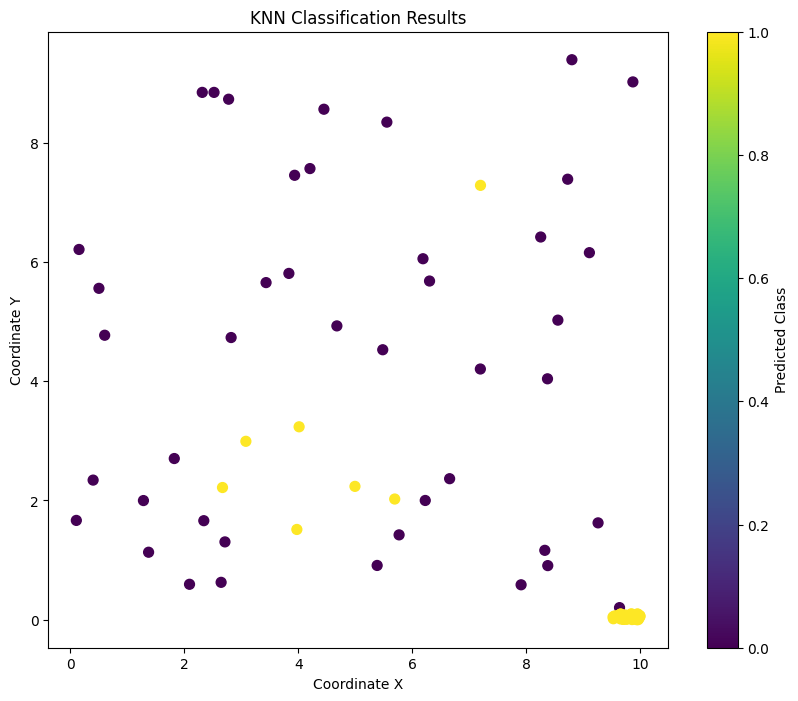

In [12]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_test['coord_x'], X_test['coord_y'], c=y_test, cmap='viridis', s=50)
plt.colorbar(label='Predicted Class')
plt.title('KNN Classification Results')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

In [13]:
print(len(X_test[(0 <= X_test['coord_y']) & (X_test['coord_y'] <= 0.1) & (9.5 <= X_test['coord_x']) & (X_test['coord_x'] <= 10)]))

50
